# Introduction to Image Processing with Pillow in Python

In this tutorial, I'll explore the basics of image processing using the **Pillow** library in Python. Pillow is great for *beginner-level image processing* tasks, such as resizing, cropping, rotating, flipping images, and converting between different color modes. **It is not** intended for more complex tasks like *object recognition* or *image segmentation*, where libraries like **OpenCV** and **scikit-image** come in handy. However, Pillow is an excellent choice for basic automation and manipulation of image files.  

How to install?   
`pip install Pillow`   

Now since the Pillow is installed, let's begin!

---

## Reading Images

To start working with images in Pillow, we first need to *read an image* file. We do this using the `Image` module from the `PIL` (Pillow) library.

In [2]:
# import library 
from PIL import Image

# Open an image file
img = Image.open("doplerUS.jpg")

# Show image details
print(f"Image Format: {img.format}")  # Output: JPEG
print(f"Image Mode: {img.mode}")      # Output: RGB
print(f"Image Size (width, height): {img.size}")   # Output: (259, 194)

Image Format: JPEG
Image Mode: RGB
Image Size (width, height): (259, 194)


**Explanation**:
- `Image.open()`: Opens an image file.
- `img.format`: Returns the format of the image (e.g., JPEG, PNG).
- `img.mode`: Describes the color space of the image (e.g., RGB, grayscale).
- `img.size`: Provides the dimensions of the image (width, height).

---

## Resizing Images

Resizing images can be done with the `.resize()` method, but this method does not maintain the aspect ratio by default. If I want to maintain the aspect ratio, I can use `.thumbnail()`.

### Resizing Without Maintaining Aspect Ratio:

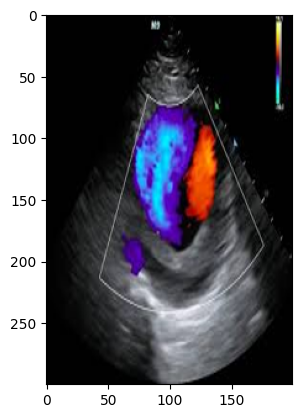

The new Width is 200 and new height is 300


In [3]:
# Resize image to new dimensions without maintaining aspect ratio
resized_img1 = img.resize((200, 300))
# Un-comment t osave the image
# resized_img.save("resized_doplerUS.jpg")

# Plot the image 
import matplotlib.pyplot as plt
plt.imshow(resized_img1)
plt.show()

# print new image size
print(f"The new Width is {resized_img1.size[0]} and new height is {resized_img1.size[1]}")

### Resizing With Aspect Ratio Preservation:

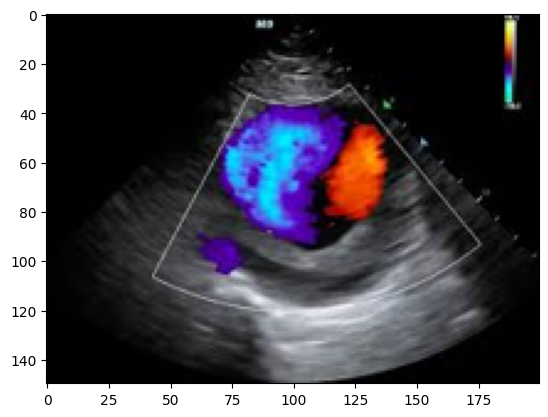

The new Width is 200 and new height is 150


In [4]:
# Resize image while maintaining aspect ratio
img.thumbnail((200, 300))
# Un-comment t osave the image
# img.save("thumbnail_image.jpg")

# Plot the image 
import matplotlib.pyplot as plt
plt.imshow(img)
# plt.axis('off')  # Optional: Hide axes
plt.show()

# print new image size
print(f"The new Width is {img.size[0]} and new height is {img.size[1]}")

**Explanation**:
- `resize()`: Resizes the image to a specific width and height, potentially **distorting** it.
- `thumbnail()`: Resizes the image to fit within the specified dimensions while preserving the aspect ratio.   

---

## Cropping and Pasting Images
### Cropping:   
Cropping an image in Pillow is straightforward using the `.crop()` method. You specify the coordinates for the box to crop: `(left, upper, right, lower)`. For example: 
We're specifying a rectangle with:
- Left edge at x = 0 (starting from the leftmost side).
- Upper edge at y = 0 (starting from the topmost side).
- Right edge at x = 50 (50 pixels from the left).
- Lower edge at y = 50 (50 pixels from the top).

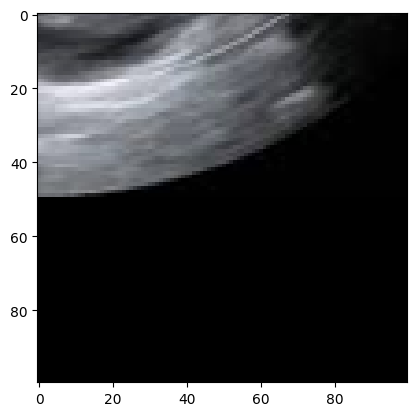

In [17]:
# Crop the image: (left, upper, right, lower)
cropped_img = img.crop((100, 100, 200, 200))
# cropped_img.save("images/cropped_image.jpg")

plt.imshow(cropped_img)
plt.show()

### Pasting:   
To paste one image onto another, we first need to open the target image and the image to paste. We can use the `.paste()` method to place one image at a specified location.

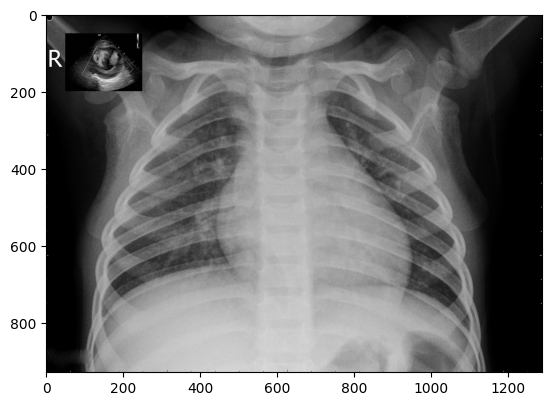

In [7]:
# Open two images
img1 = Image.open("test_image.jpeg")
img2 = Image.open("doplerUS.jpg")

# Resize img2 to fit
img2.thumbnail((200, 200))

# Create a copy of img1
img1_copy = img1.copy()

# Paste img2 onto img1_copy at coordinates (50, 50)
img1_copy.paste(img2, (50, 50))

# Save the result
# img1_copy.save("images/pasted_image.jpg")

plt.imshow(img1_copy, cmap="gray")
plt.show()

---

## Rotating and Flipping Images

Pillow makes it easy to rotate and flip images using `.rotate()` and `.transpose()`.

### Rotating:

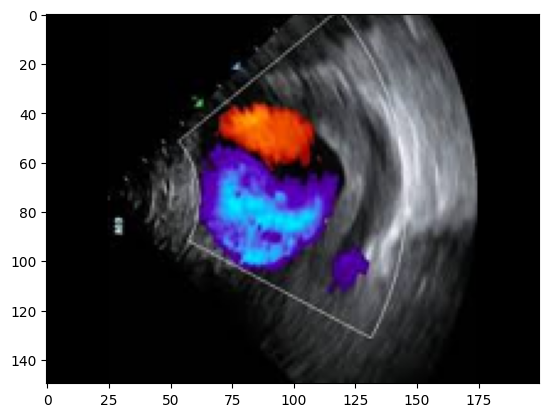

In [ ]:
# Rotate image by 90 degrees
rotated_img = img.rotate(90)

plt.imshow(rotated_img)

If we want to keep the entire image after rotation (including the corners that may get cut off), we can use the expand=True option.

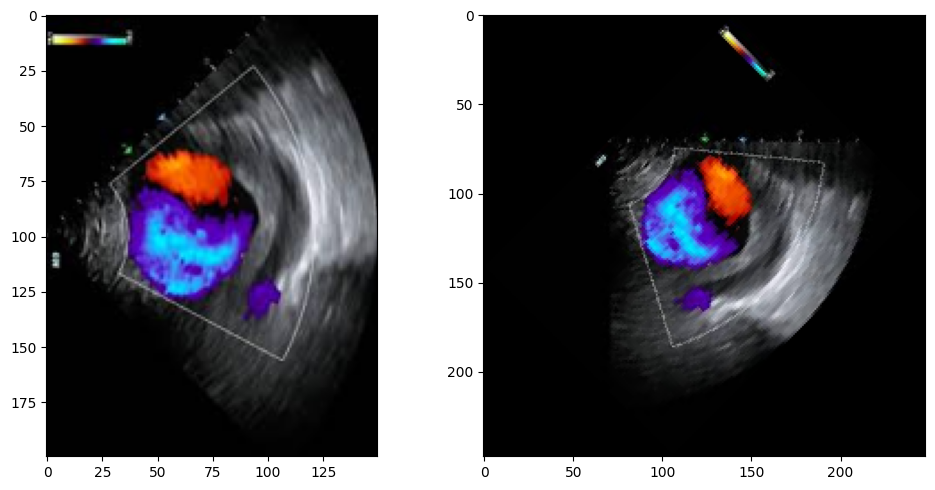

In [ ]:
# Rotate image by 90 degrees
rotated_img = img.rotate(90, expand = True)
rotated_img1 = img.rotate(45, expand = True)

fig, axes = plt.subplots(1, 2, figsize = (10, 5))
axes[0].imshow(rotated_img)
axes[1].imshow(rotated_img1)

plt.tight_layout()
plt.show()

**Explanation**:
- `plt.subplots(1, 2)`: Creates a grid of 1 row and 2 columns for images.
- `axes[0].imshow(rotated_img)`: Displays the first rotated image on the left.
- `axes[1].imshow(rotated_img1)`: Displays the second rotated image on the right.
- `axes[i].axis('off')`: Hides the axes for a cleaner image display.
- `plt.tight_layout()`: Automatically adjusts the spacing between the subplots for better layout.

This will display the rotated images side by side in a single window.

### Flipping:

Pillow also provides methods for flipping images horizontally or vertically using `.transpose()`.

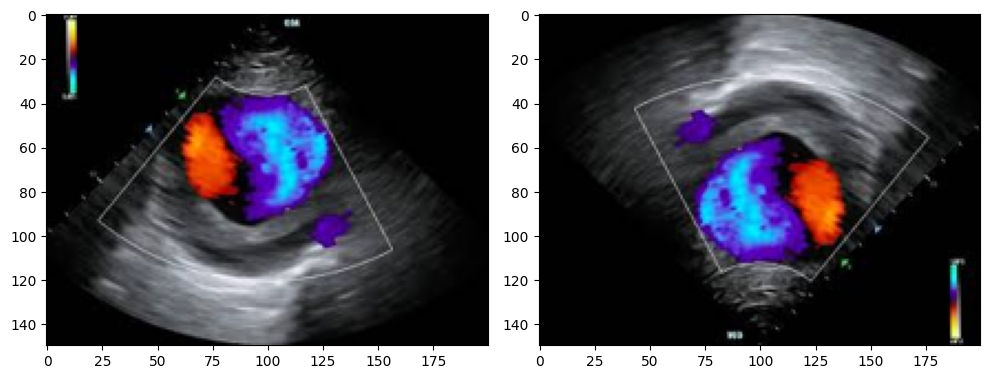

In [27]:
# Flip image horizontally (left to right)
flipped_img_lr = img.transpose(Image.FLIP_LEFT_RIGHT)

# Flip image vertically (top to bottom)
flipped_img_tb = img.transpose(Image.FLIP_TOP_BOTTOM)

fig, axes = plt.subplots(1, 2, figsize = (10, 5))
axes[0].imshow(flipped_img_lr)
axes[1].imshow(flipped_img_tb)

plt.tight_layout()
plt.show()


---

## Converting Between Color Modes

Pillow supports converting between different color spaces like grayscale, RGB, and CMYK. To convert an image to grayscale, use `.convert()`.

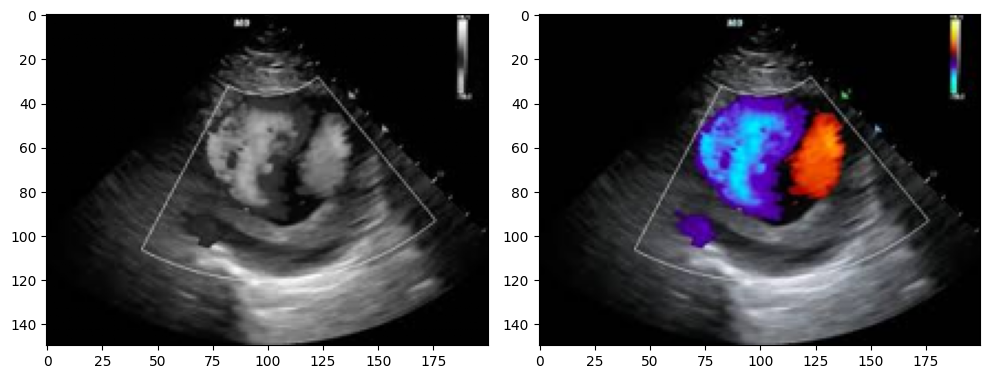

In [8]:
# Convert the image to grayscale
gray_img = img.convert("L")

fig, axes = plt.subplots(1, 2, figsize = (10, 5))
axes[0].imshow(gray_img, cmap = "gray")
axes[1].imshow(img)

plt.tight_layout()
plt.show()


Other possible modes:
- "RGB": Standard color mode.
- "L": Grayscale mode.
- "CMYK": Cyan, Magenta, Yellow, and Key (Black) mode.   

---

## Automating Image Processing

If we have a folder full of images and want to apply the same process to each, we can automate this with the glob library to read files and apply processing to all of them.

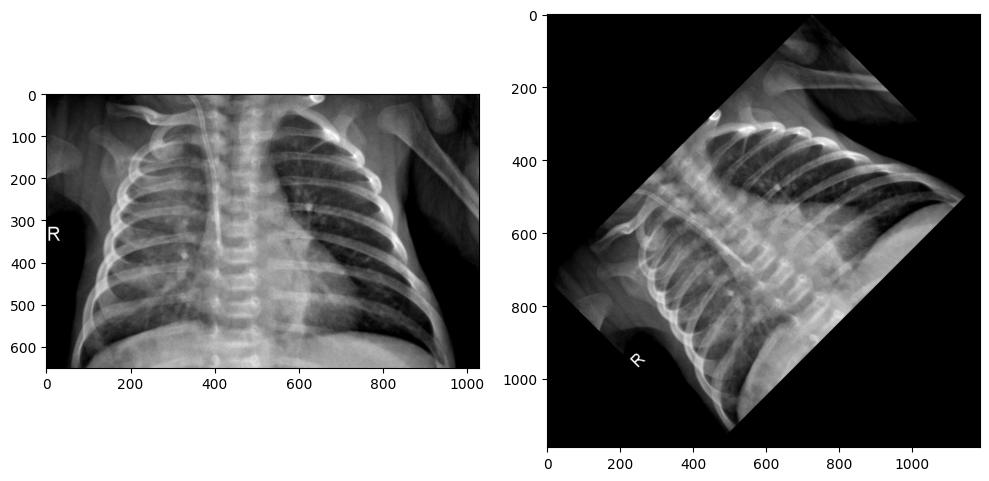

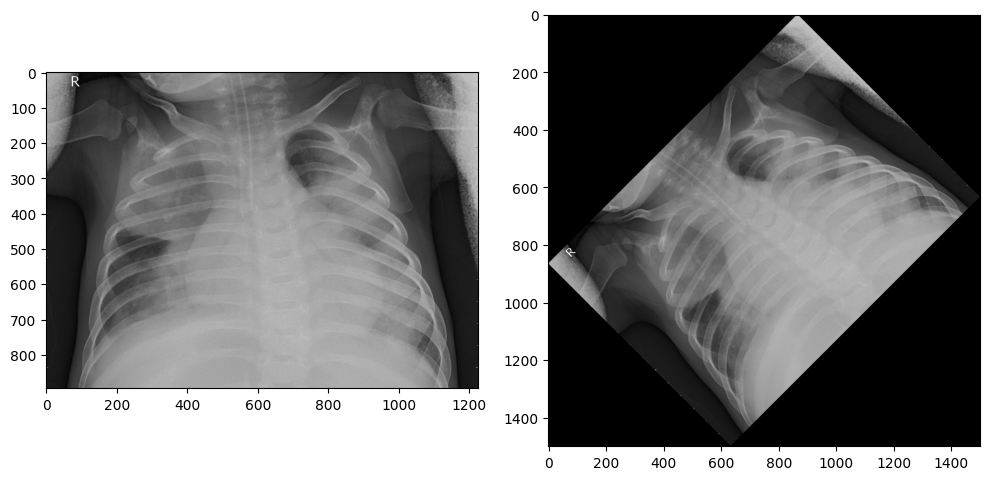

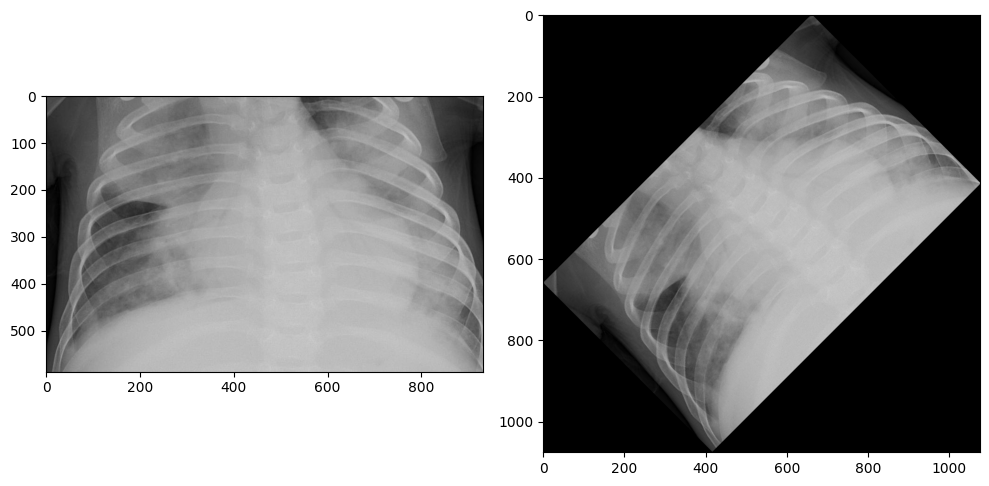

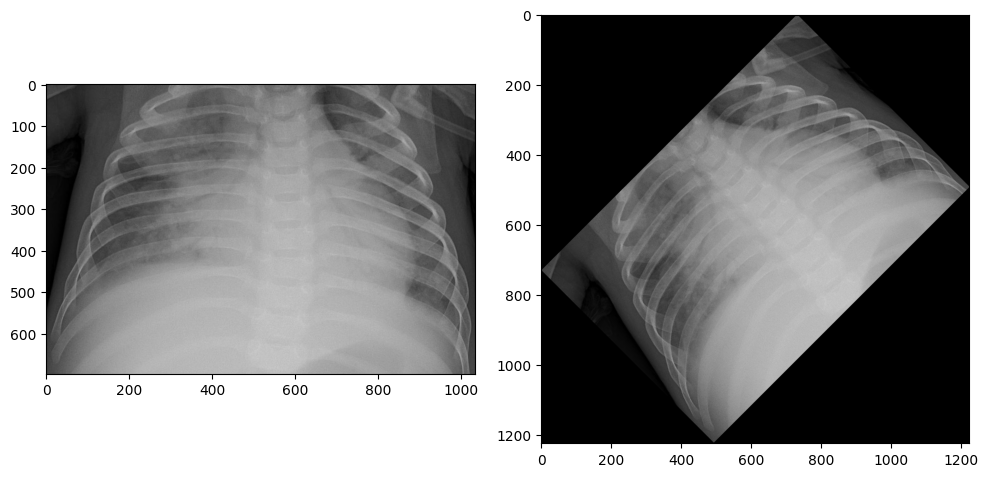

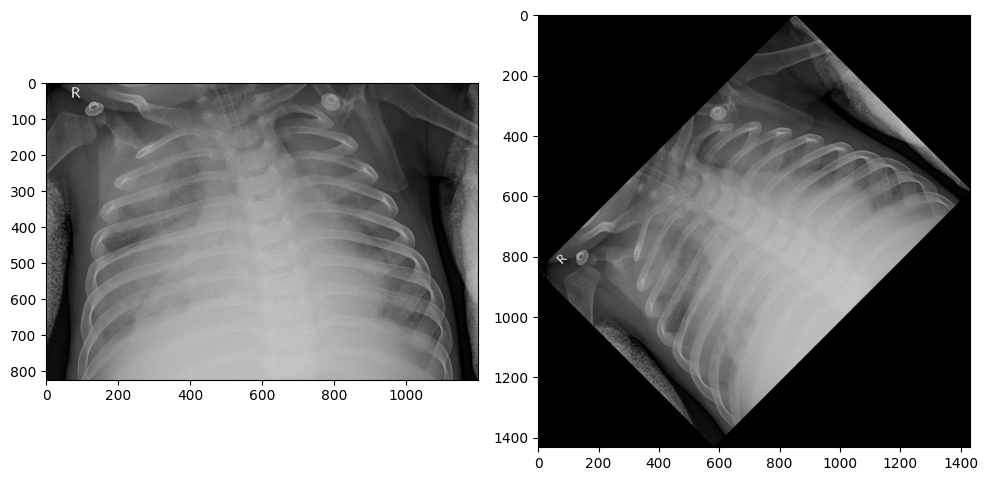

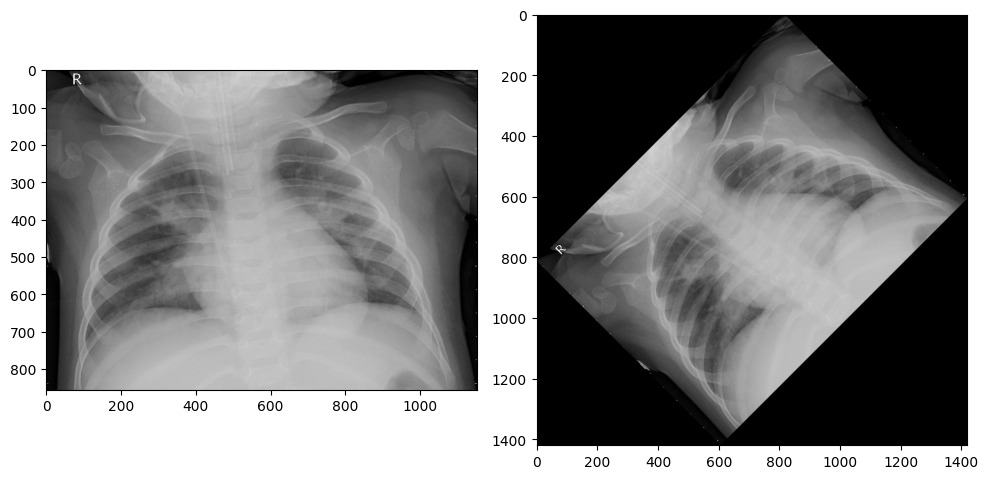

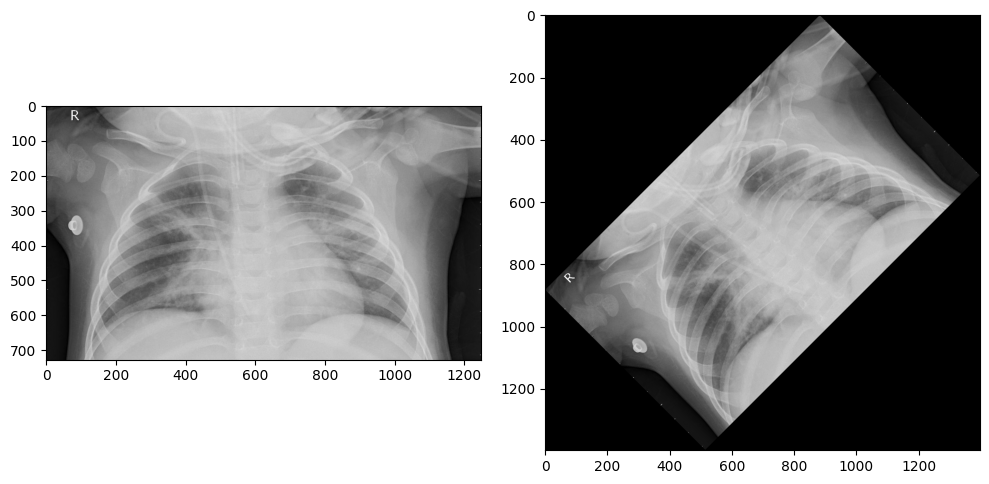

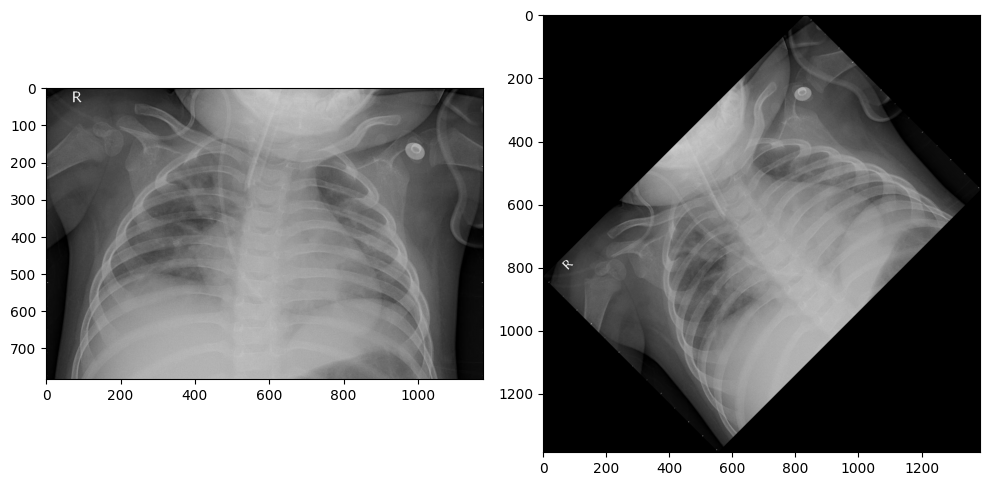

In [33]:
import glob

# Set path to images
path = "xray_images/*.jpeg"

# Iterate through all images in the folder
for file in glob.glob(path):
    img = Image.open(file)

    # Rotate each image by 45 degrees
    rotated_img = img.rotate(45, expand=True)

    # Save the processed image
    # rotated_img.save(f"{file}_rotated_45.jpg")
    
    # Display them
    fig, axes = plt.subplots(1, 2, figsize = (10, 5))
    axes[0].imshow(img, cmap = "gray")
    axes[1].imshow(rotated_img, cmap = "gray")

    plt.tight_layout()
    plt.show()


Explanation:
- `glob.glob()`: Retrieves all files in a directory matching a pattern (e.g., all .jpg files).
- `image.save()`: Saves each processed image with a new filename.   

---

**As a quick recap**: 
In this notebook, we learned how to perform basic image processing tasks such as:
- **Reading** and **displaying** image information.
- **Resizing** images while maintaining or ignoring the aspect ratio.
- **Cropping** and **pasting** images.
- **Rotating** and **flipping** images.
- Converting between different color modes.
- **Automating** the process for multiple images using the **glob** library.

While Pillow is great for *simple tasks*, more advanced image processing will require libraries like **OpenCV** or **scikit-image**. We can explore further by checking out Pillow’s documentation (Use GPT instead!) and experimenting with the many other features it provides.